In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [27]:
cd data

[Error 2] The system cannot find the file specified: u'data'
C:\Users\mery-\Desktop\Development\machine-learning-with-python\data


In [28]:
vehicles = pd.read_csv("vehicle.csv")
vehicles.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio,vehicle_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus
5,107.0,57.0,106.0,172.0,50.0,6.0,255.0,26.0,28.0,169.0,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183.0,bus
6,97.0,43.0,73.0,173.0,65.0,6.0,153.0,42.0,19.0,143.0,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204.0,bus
7,90.0,43.0,66.0,157.0,65.0,9.0,137.0,48.0,18.0,146.0,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202.0,van
8,86.0,34.0,62.0,140.0,61.0,7.0,122.0,54.0,17.0,127.0,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208.0,van
9,93.0,44.0,98.0,197.0,62.0,11.0,183.0,36.0,22.0,146.0,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204.0,saab


In [29]:
vehicles["vehicle_class"].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

In [30]:
y = vehicles["vehicle_class"]
x = vehicles.drop("vehicle_class", axis=1)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
predictions

array(['opel', 'saab', 'van', 'bus', 'van', 'saab', 'van', 'van', 'opel',
       'bus', 'saab', 'van', 'bus', 'opel', 'bus', 'saab', 'saab', 'van',
       'saab', 'bus', 'saab', 'bus', 'saab', 'van', 'van', 'bus', 'opel',
       'saab', 'bus', 'van', 'saab', 'saab', 'opel', 'saab', 'opel',
       'van', 'saab', 'van', 'saab', 'opel', 'bus', 'van', 'bus', 'bus',
       'van', 'bus', 'saab', 'bus', 'opel', 'opel', 'opel', 'saab',
       'saab', 'opel', 'saab', 'van', 'opel', 'bus', 'van', 'van', 'bus',
       'bus', 'saab', 'opel', 'opel', 'saab', 'bus', 'saab', 'opel',
       'bus', 'saab', 'saab', 'bus', 'van', 'saab', 'van', 'saab', 'opel',
       'bus', 'saab', 'saab', 'van', 'van', 'bus', 'opel', 'opel', 'bus',
       'van', 'van', 'bus', 'opel', 'opel', 'van', 'opel', 'bus', 'saab',
       'saab', 'opel', 'van', 'van', 'van', 'bus', 'van', 'bus', 'bus',
       'saab', 'saab', 'saab', 'bus', 'van', 'opel', 'opel', 'saab',
       'opel', 'opel', 'bus', 'bus', 'bus', 'opel', 'van', 's

In [33]:
print(confusion_matrix(y_test, predictions))

[[59  1  3  1]
 [ 5 21 30  7]
 [ 6 27 35  2]
 [ 4  3  0 50]]


In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         bus       0.80      0.92      0.86        64
        opel       0.40      0.33      0.37        63
        saab       0.51      0.50      0.51        70
         van       0.83      0.88      0.85        57

   micro avg       0.65      0.65      0.65       254
   macro avg       0.64      0.66      0.65       254
weighted avg       0.63      0.65      0.64       254



In [35]:
error = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    prediction = knn.predict(x_test)
    error.append(np.mean(prediction != y_test))

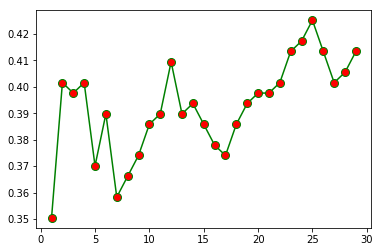

In [37]:
values =  range(1, 30)
plt.plot(values, error, color="green", marker="o", markerfacecolor="red", markersize=8)

In [38]:
# Once we have seen the value with the smallest error in the previous plot,
# we know, which is the best value for k

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
predictions

array(['opel', 'opel', 'van', 'bus', 'van', 'bus', 'van', 'bus', 'opel',
       'bus', 'saab', 'van', 'bus', 'saab', 'bus', 'saab', 'saab', 'van',
       'opel', 'bus', 'saab', 'saab', 'saab', 'van', 'van', 'bus', 'opel',
       'bus', 'bus', 'van', 'saab', 'saab', 'saab', 'opel', 'opel', 'van',
       'saab', 'van', 'saab', 'saab', 'bus', 'van', 'bus', 'bus', 'van',
       'bus', 'saab', 'bus', 'bus', 'opel', 'saab', 'bus', 'saab', 'van',
       'saab', 'van', 'opel', 'bus', 'van', 'van', 'saab', 'bus', 'saab',
       'opel', 'opel', 'saab', 'bus', 'saab', 'opel', 'bus', 'saab',
       'saab', 'bus', 'opel', 'saab', 'bus', 'saab', 'opel', 'bus',
       'opel', 'bus', 'van', 'van', 'bus', 'opel', 'opel', 'bus', 'van',
       'van', 'bus', 'opel', 'opel', 'van', 'bus', 'bus', 'saab', 'saab',
       'saab', 'van', 'van', 'bus', 'van', 'van', 'bus', 'bus', 'saab',
       'opel', 'saab', 'bus', 'opel', 'opel', 'saab', 'van', 'opel',
       'opel', 'bus', 'bus', 'bus', 'opel', 'van', 'saab'